## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression
#import sklearn.linear_model as LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#drug_study_df = study_results.merge(mouse_metadata, on = 'Mouse ID', how = 'outer')
drug_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")
# Display the data table for preview
data_table_preview_df = drug_study_df.sort_values(["Timepoint"], ascending = (True)).reset_index()
del data_table_preview_df['index']
data_table_preview_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s619,Stelasyn,Male,22,30,0,45.0,0
2,a818,Naftisol,Female,12,28,0,45.0,0
3,t198,Propriva,Male,22,26,0,45.0,0
4,a788,Zoniferol,Male,5,30,0,45.0,0


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata["Mouse ID"])
print(f'Number of mice in drug study are :{number_of_mice}')

Number of mice in drug study are :249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = drug_study_df.loc[drug_study_df.duplicated(subset=['Mouse ID', 'Timepoint',]),"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
drug_study_df[drug_study_df['Mouse ID'].isin(duplicate_mice_id)==True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df_after_dropping_duplicate = drug_study_df[drug_study_df['Mouse ID'].isin(duplicate_mice_id)==False]
#clean_mice_after_removal_duplicate_df = 
clean_df_after_dropping_duplicate.head(5)                                         

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_df = clean_df_after_dropping_duplicate["Mouse ID"].nunique()
print(f'number of mice in the clean DataFrame : {mice_in_clean_df}')

number of mice in the clean DataFrame : 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_study_mean_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_study_median_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_study_variance_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_study_stddev_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_study_sem_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#drug_study_df.head(2)

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume":  drug_study_mean_volume_df,
              "Median Tumor Volume": drug_study_median_volume_df,
              "Tumor Volume Variance": drug_study_variance_volume_df,
              "Tumor Volume Std. Dev.": drug_study_stddev_volume_df,
              "Tumor Volume Std.Err." : drug_study_sem_volume_df
             })
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_study_volume_df = drug_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
drug_study_volume_df.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0.5, 'Number of Unique Mice Tested'), Text(0.5, 0, 'Drug Regimen')]

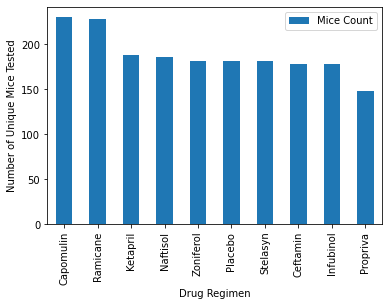

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#clean_df_after_dropping_duplicate["Drug Regimen","Mouse ID"].groupby()
bar_plot_mice_drug_df = clean_df_after_dropping_duplicate[["Mouse ID","Drug Regimen"]].groupby("Drug Regimen")
bar_plot_chart_df = bar_plot_mice_drug_df.count().rename(columns={"Mouse ID":"Mice Count"}
                                    ).sort_values("Mice Count",ascending = False
                                                 ).plot(kind = 'bar')

bar_plot_chart_df.set(xlabel = "Drug Regimen",ylabel = "Number of Unique Mice Tested")

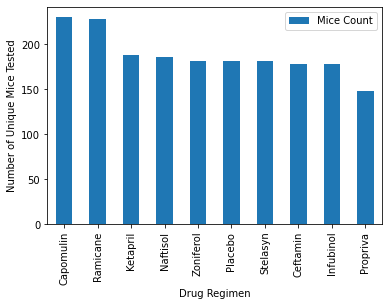

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_plot_chart_df = bar_plot_mice_drug_df.count().rename(columns={"Mouse ID":"Mice Count"}
                                    ).sort_values("Mice Count",ascending = False
                                                 )


bar_plot_chart_df.plot(kind = 'bar')
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()

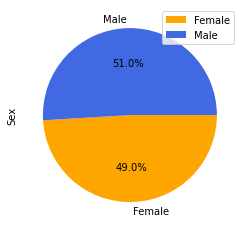

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

distribution_of_female_male_df = clean_df_after_dropping_duplicate[["Mouse ID","Sex"]].groupby("Sex").count().rename(columns={"Mouse ID":"Sex"})

distribution_of_female_male_df.plot.pie(y="Sex",autopct='%1.1f%%',colors = ["orange","royalblue"],counterclock=False) 

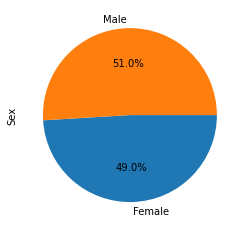

In [13]:
my_data = distribution_of_female_male_df.values.tolist()
plt.pie(my_data,autopct='%1.1f%%',counterclock=False,labels=["Female","Male"])
plt.ylabel("Sex")
plt.show(block=False)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens_condition = clean_df_after_dropping_duplicate["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])
treatment_regimens_condition_df = clean_df_after_dropping_duplicate[treatment_regimens_condition][["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]
treatment_regimens_group_df = treatment_regimens_condition_df.groupby("Mouse ID") 
treatment_regimens_group_df.sum().head(4)

,Tumor Volume (mm3)
Mouse ID,
a203,563.127077
a251,552.370946
a275,527.709651
a411,407.013854


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_df_groupby_df = clean_df_after_dropping_duplicate[["Mouse ID","Drug Regimen","Timepoint"]].groupby("Mouse ID")
max_timepoint_df = clean_df_groupby_df["Timepoint"].max()
cleaned_merged_max_timepoint_df = pd.merge(max_timepoint_df,clean_df_after_dropping_duplicate, on=["Mouse ID", "Timepoint"], how="left")
cleaned_merged_max_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Sample Code was provided by class instructor##
#Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = cleaned_merged_max_timepoint_df.loc[cleaned_merged_max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    if drug == "Capomulin":
        tumor_vol_capomulin.append(final_tumor_vol)
    elif drug == "Ramicane":
         tumor_vol_ramicane.append(final_tumor_vol)
    elif drug == "Infubinol":
        tumor_vol_infubinol.append(final_tumor_vol)
    else:
        tumor_vol_ceftamin.append(final_tumor_vol)

        
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#For drug Capomulin
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    if drug == "Capomulin":
        final_tumor_vol_capomulin = cleaned_merged_max_timepoint_df.loc[cleaned_merged_max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']        
        tumor_vol_capomulin.append(final_tumor_vol_capomulin)
        final_tumor_vol_capomulin_quantile = final_tumor_vol_capomulin.quantile([.25,.5,.75])  
        Q2_capomulin  = final_tumor_vol_capomulin_quantile[.5]
        Q1_capomulin  = final_tumor_vol_capomulin_quantile[.25]
        Q3_capomulin  = final_tumor_vol_capomulin_quantile[.75]
        capomulin_min = final_tumor_vol_capomulin.min()
        capomulin_max = final_tumor_vol_capomulin.max()
        boxplot_capomulin_df = pd.DataFrame([capomulin_min, Q1_capomulin, Q2_capomulin,Q3_capomulin,capomulin_max],columns = ["Capomulin"])
        
    elif drug == "Ramicane":
        final_tumor_vol_ramicane = cleaned_merged_max_timepoint_df.loc[cleaned_merged_max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']        
        tumor_vol_ramicane.append(final_tumor_vol_ramicane)
        final_tumor_vol_ramicane_quantile = final_tumor_vol_ramicane.quantile([.25,.5,.75])  
        Q2_ramicane  = final_tumor_vol_ramicane_quantile[.5]
        Q1_ramicane  = final_tumor_vol_ramicane_quantile[.25]
        Q3_ramicane  = final_tumor_vol_ramicane_quantile[.75]
        ramicane_min = final_tumor_vol_ramicane.min()
        ramicane_max = final_tumor_vol_ramicane.max()
        boxplot_ramicane_df = pd.DataFrame([ramicane_min, Q1_ramicane, Q2_ramicane,Q3_ramicane,ramicane_max],columns = ["Ramicane"])
        
    elif drug == "Infubinol":
        final_tumor_vol_infubinol = cleaned_merged_max_timepoint_df.loc[cleaned_merged_max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']        
        tumor_vol_infubinol.append(final_tumor_vol_infubinol)
        final_tumor_vol_infubinol_quantile = final_tumor_vol_infubinol.quantile([.25,.5,.75])  
        Q2_infubinol  = final_tumor_vol_infubinol_quantile[.5]
        Q1_infubinol  = final_tumor_vol_infubinol_quantile[.25]
        Q3_infubinol  = final_tumor_vol_infubinol_quantile[.75]
        infubinol_min = final_tumor_vol_infubinol.min()
        infubinol_max = final_tumor_vol_infubinol.max()
        boxplot_infubinol_df = pd.DataFrame([infubinol_min, Q1_infubinol, Q2_infubinol,Q3_infubinol,infubinol_max],columns = ["infubinol"])                                                                                                                                     
    else:
        final_tumor_vol_ceftamin = cleaned_merged_max_timepoint_df.loc[cleaned_merged_max_timepoint_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']        
        tumor_vol_ceftamin.append(final_tumor_vol_ceftamin)
        final_tumor_vol_ceftamin_quantile = final_tumor_vol_ceftamin.quantile([.25,.5,.75])  
        Q2_ceftamin  = final_tumor_vol_ceftamin_quantile[.5]
        Q1_ceftamin  = final_tumor_vol_ceftamin_quantile[.25]
        Q3_ceftamin  = final_tumor_vol_ceftamin_quantile[.75]
        ceftamin_min = final_tumor_vol_ceftamin.min()
        ceftamin_max = final_tumor_vol_ceftamin.max()
        boxplot_ceftamin_df = pd.DataFrame([ceftamin_min, Q1_ceftamin, Q2_ceftamin,Q3_ceftamin,ceftamin_max],columns = ["ceftamin"])

        


#final_tumor_vol_capomulin

Text(0, 0.5, 'Final Tumor Volume(mm3)')

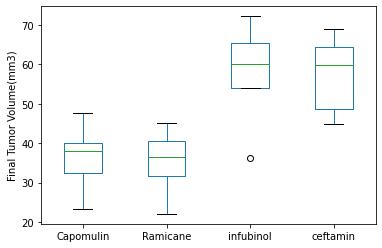

In [18]:
df1_merge = pd.merge(boxplot_capomulin_df,boxplot_ramicane_df,left_index= True, right_index = True)
df2_merge = pd.merge(df1_merge,boxplot_infubinol_df,left_index= True, right_index = True)
df3_merge = pd.merge(df2_merge,boxplot_ceftamin_df,left_index= True, right_index = True)
df3_merge.boxplot(grid=False)
plt.ylabel("Final Tumor Volume(mm3)")

## Line and Scatter Plots

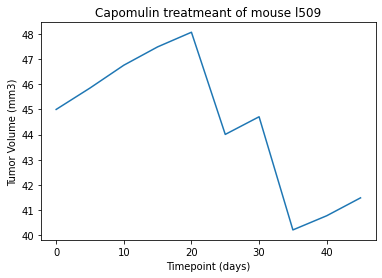

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = drug_study_df.loc[drug_study_df["Drug Regimen"] == "Capomulin",:]
miceline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = miceline_df["Timepoint"]
y_axis = miceline_df["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


Text(0, 0.5, 'Average Tumor Volume(mm3)')

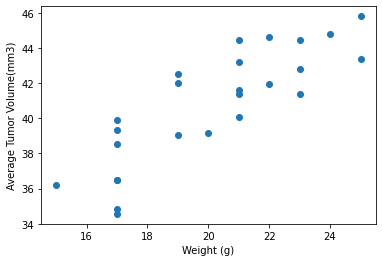

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_weight_avg_tumor = capomulin_df.groupby(["Mouse ID"]).mean()
x_axis = mice_weight_avg_tumor["Weight (g)"]
#mice_weight_avg_tumor.head(3)
y_axis = mice_weight_avg_tumor["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume(mm3)")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mean_df = capomulin_df.groupby(['Mouse ID']).mean()
corr=round(st.pearsonr(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [22]:
st.linregress(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

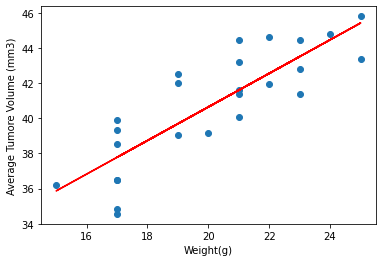

In [23]:
plotslope = 0.9544396890241045
plotintercept = 21.552160532685015
y = capomulin_mean_df['Weight (g)']* plotslope + plotintercept
plt.scatter(capomulin_mean_df['Weight (g)'],capomulin_mean_df['Tumor Volume (mm3)'])
plt.plot(capomulin_mean_df['Weight (g)'],y,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()